In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pygwalker as pyg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\user\OneDrive - University of Houston Downtown\Data Mining\AKI_EDA_CS5310\Raw_aki_patient_data.csv")

In [3]:
# Take look at percenatge of missing values per feature(column)
per_missing = df.isnull().sum()*100/len(df)
per_missing_df = pd.DataFrame(
    {"Feature Name": df.columns,
     "Missing Percentage": per_missing}
)
# Sort the percentage in a descending order
per_missing_df.sort_values(ascending=False, by="Missing Percentage", inplace=True)

uo_rt_12hr (the 12 hour urine output) have very high missing precentages, this is important to note as these could be important indicators of kidney health. Although, they will be left out of our dataset due to high missing precentage.

In [4]:
#Look at data type, number of unique, contains nan (bool), and count of nan.
dftype=pd.DataFrame(df.dtypes, columns=['pd_type'])
dftype['num_unique'] = df.nunique()
dftype['nan_bool'] = df.isna().any() #True here missing we do have missing values in our dataset. (NAns)
dftype['n_nan'] = df.isna().sum()

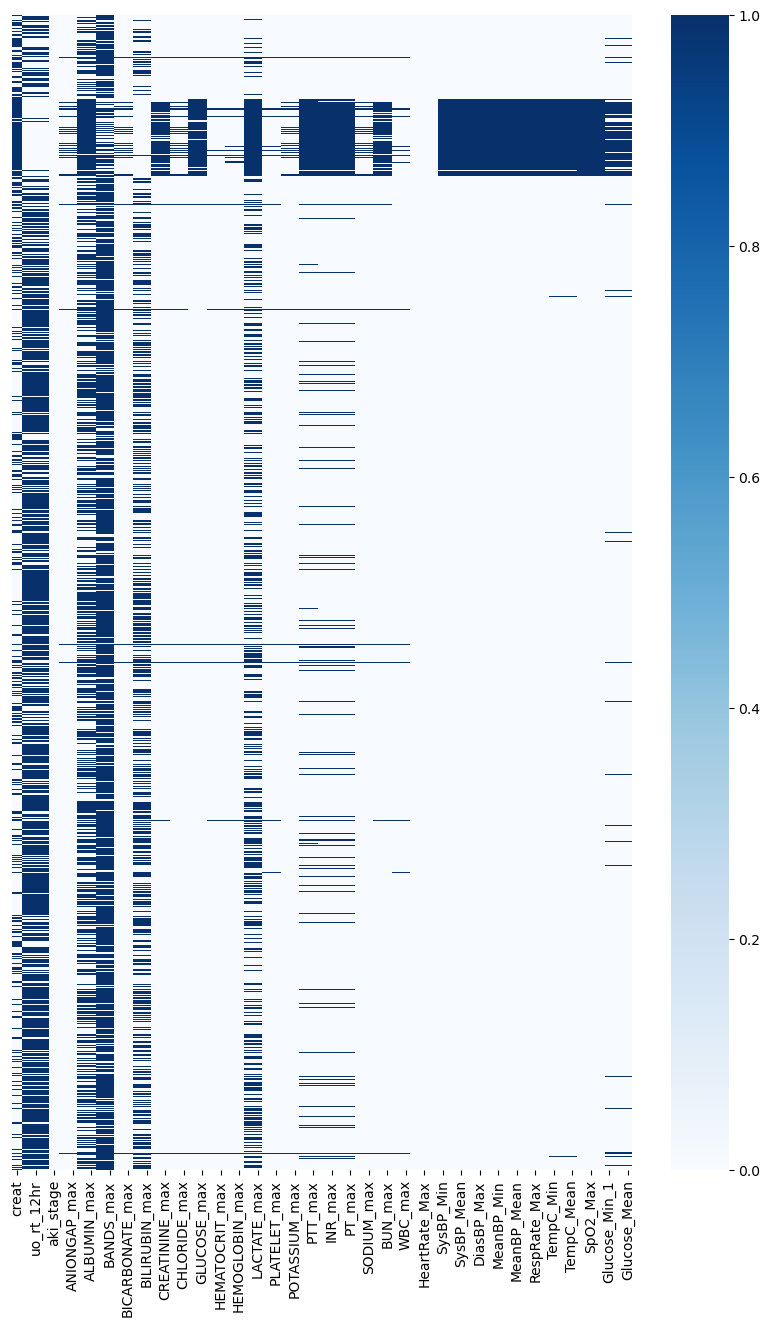

In [5]:
plt.figure(figsize=(10,15))

#Convert boolean data to integers NaN True to 1, NaN False to 0
missing_data = df.isnull().astype(int)
#Heatmap, Where blue is missing.
sns.heatmap(missing_data, cbar=True, cmap='Blues', yticklabels=False)

plt.show()

In [6]:
# Drop the feature if the missing percenatge is greater than 40 percent
for feature in per_missing_df["Feature Name"].values:
  if per_missing_df.at[feature, "Missing Percentage"] >= 40:
    df.drop([feature], inplace=True, axis=1)

In [7]:
#Now dealing with Na's interpolation of missing data
#Fill all NA's with mean value from that column
for feature in df.columns:
  # Calculate the mean values of each column ignoring nas
  mean_value = df[feature].mean(skipna=True)
  # Interpolate the missing value with the mean value
  df[feature].fillna(value=mean_value, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_16152\407283130.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(value=mean_value, inplace=True)


In [8]:
#Verify no Nas left, (False = no Nans left....) 
df.isnull().values.any()

False

In [9]:
#Look at summary statistics of dataset
df.describe()

,creat,aki_stage,ANIONGAP_min,ANIONGAP_max,BICARBONATE_min,BICARBONATE_max,CREATININE_min,CREATININE_max,CHLORIDE_min,CHLORIDE_max,...,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min_1,Glucose_Max_1,Glucose_Mean
count,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,...,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000
mean,1.342936,0.310342,11.226164,16.918395,21.665044,28.048840,1.095230,1.753217,99.981574,108.503743,...,19.083222,35.852295,37.717340,36.830278,87.983899,99.704848,96.879729,95.057013,239.531548,137.017814
std,1.217599,0.781658,3.105499,4.602545,4.665786,4.568863,1.056676,1.952617,5.693187,5.840850,...,3.539276,0.769855,0.809219,0.540202,11.542212,1.077874,2.346509,31.113892,5970.922590,154.523360
min,0.000000,0.000000,1.000000,4.000000,2.000000,5.000000,0.050000,0.100000,1.600000,74.000000,...,7.333333,15.000000,30.000000,30.000000,0.500000,42.000000,31.444444,0.106000,1.000000,1.000000
25%,0.800000,0.000000,9.000000,14.000000,19.000000,25.000000,0.600000,0.900000,97.000000,105.000000,...,16.644444,35.555556,37.166668,36.518056,87.983899,100.000000,96.129032,78.000000,141.000000,113.757143
50%,1.200000,0.000000,11.000000,16.000000,22.000000,28.000000,0.800000,1.200000,100.000000,108.000000,...,18.935484,35.852295,37.700000,36.830278,91.000000,100.000000,97.041667,94.000000,183.000000,130.714286
75%,1.342936,0.000000,13.000000,19.000000,24.000000,30.000000,1.100000,1.753217,103.000000,112.000000,...,20.943820,36.277779,38.166665,37.133333,94.000000,100.000000,98.153846,107.000000,239.531548,148.500000
max,20.100000,3.000000,45.000000,77.000000,52.000000,60.000000,19.100000,138.000000,134.000000,198.000000,...,43.777778,40.833333,46.500000,40.833333,100.000000,100.000000,100.000000,798.000000,999999.000000,32392.483871


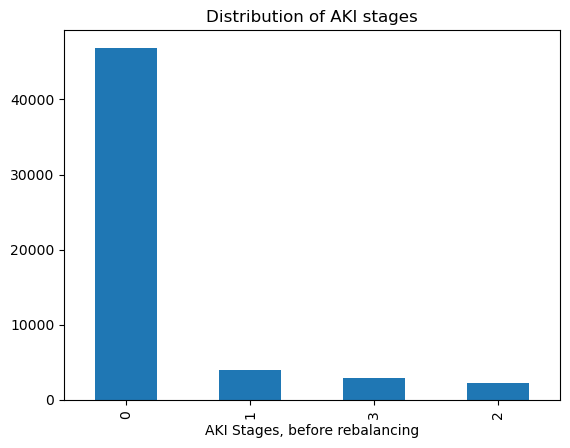

In [10]:
#Rebalancing the class distribution
df['aki_stage'].value_counts().plot.bar()
plt.title("Distribution of AKI stages")
plt.xlabel("AKI Stages, before rebalancing")
plt.show()
#Zero is by far higher than the rest.

In [11]:
df['aki_stage'].value_counts()
#As you can see the unbalance.

aki_stage
0    46867
1     3995
3     2951
2     2280
Name: count, dtype: int64

In [12]:
#Only keeping 10% of class 0
#Made new df named df_dist to prevent future confusion
df_dist = df.drop(df[df['aki_stage'] == 0].sample(frac=0.9).index)

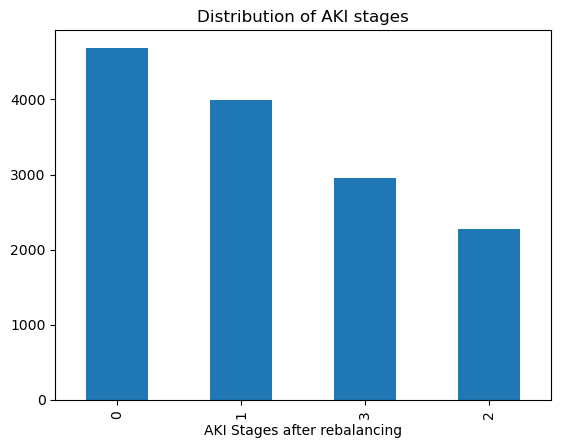

In [13]:
#After Rebalancing
df_dist["aki_stage"].value_counts().plot.bar()
plt.title("Distribution of AKI stages")
plt.xlabel("AKI Stages after rebalancing")
plt.show()
# We can see that the class distribution is much balance now

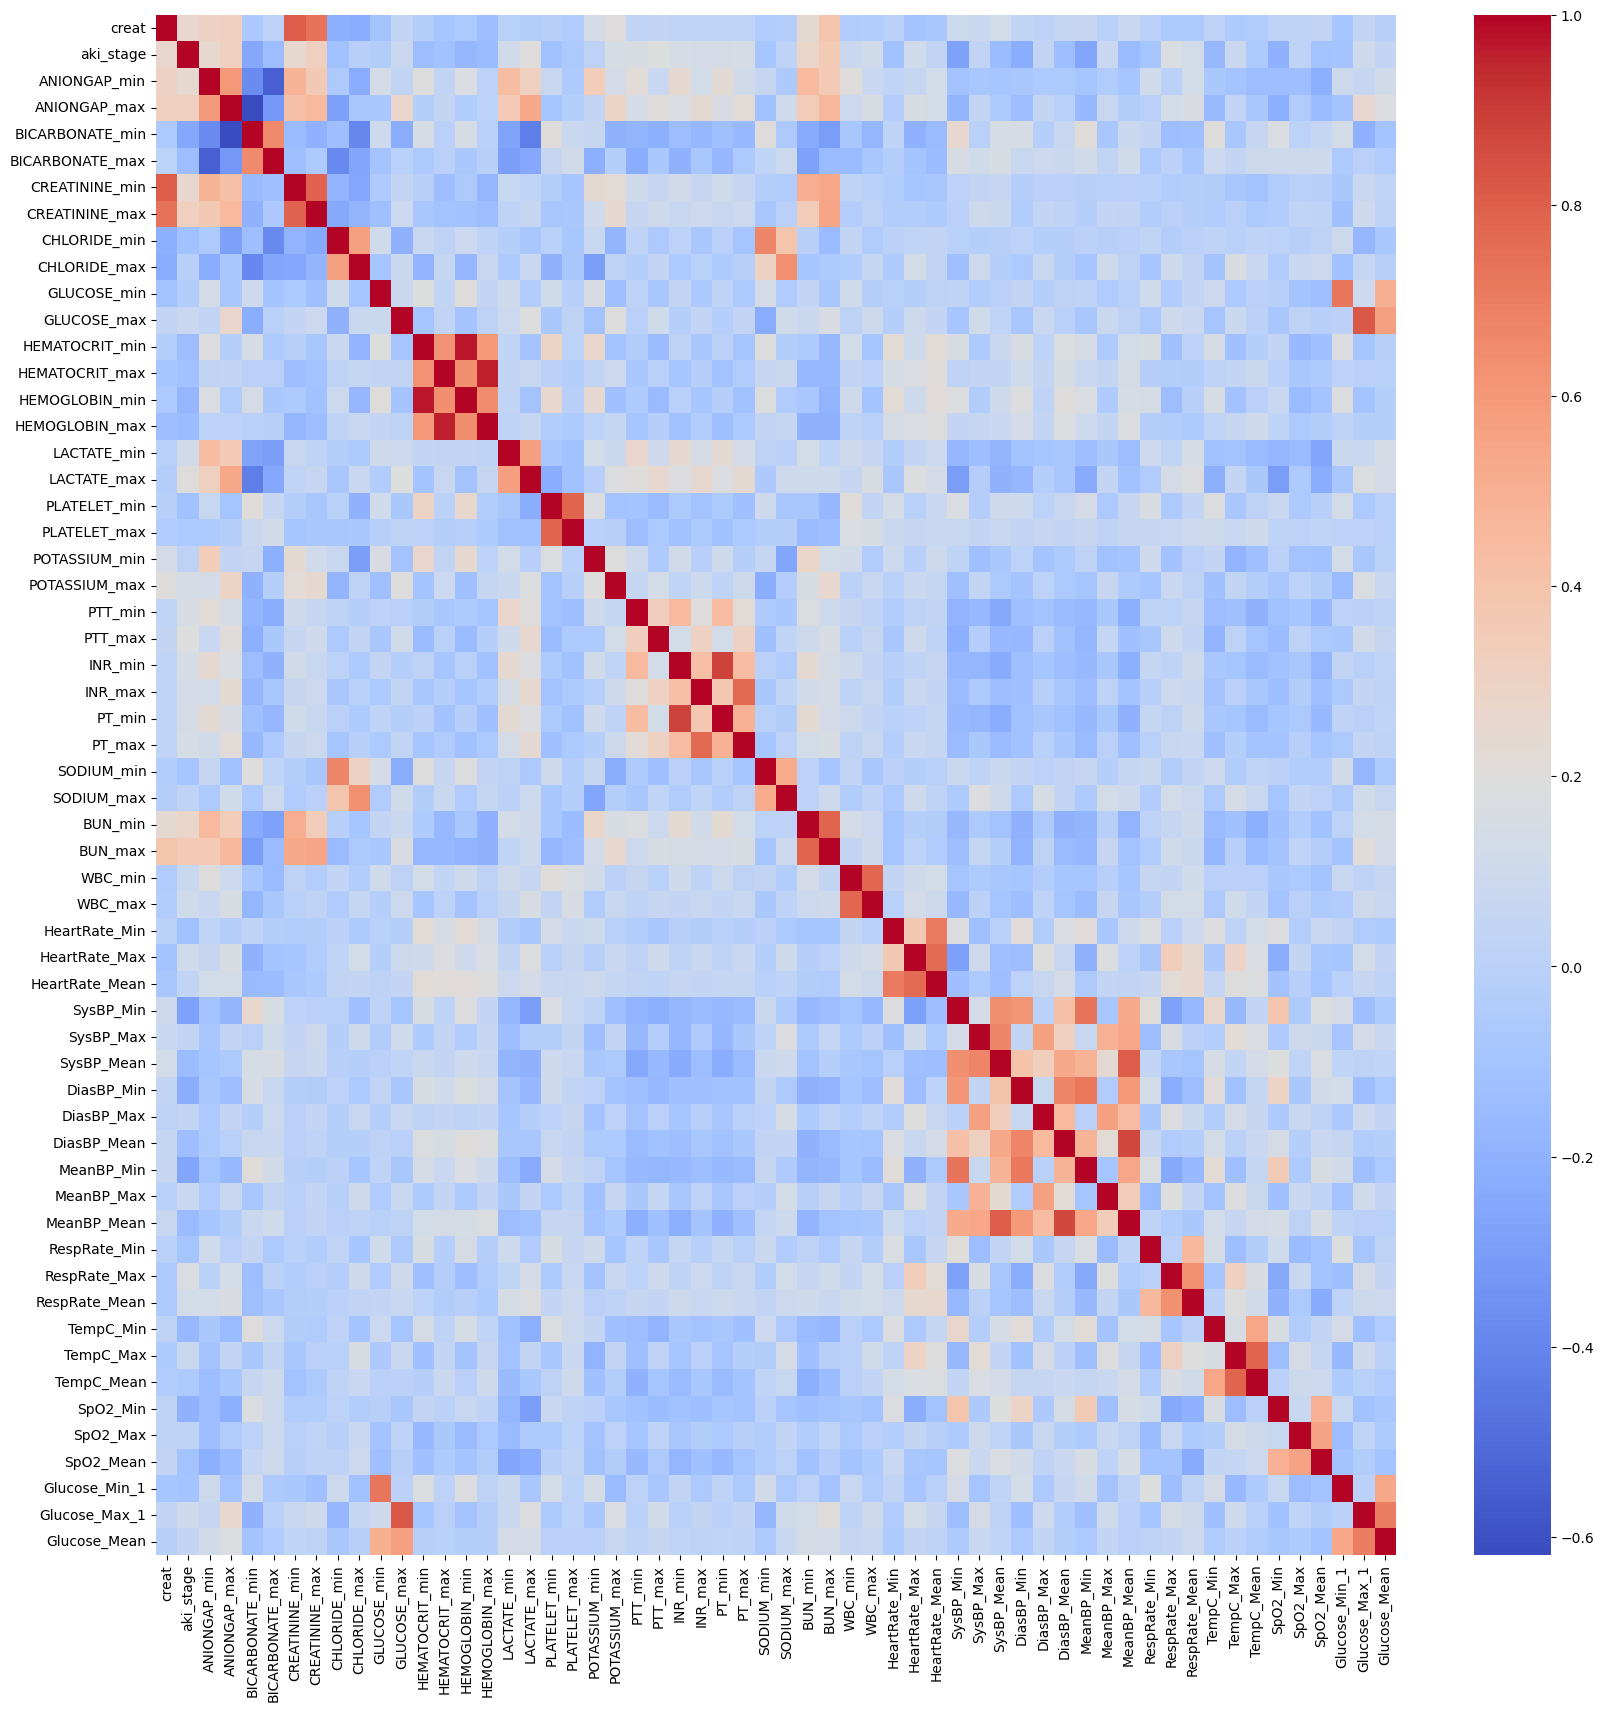

In [14]:
#Correlation matrix in seaborn/plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# Add a diverging color palette
sns.heatmap(df_dist.corr(), cmap='coolwarm')
plt.show()

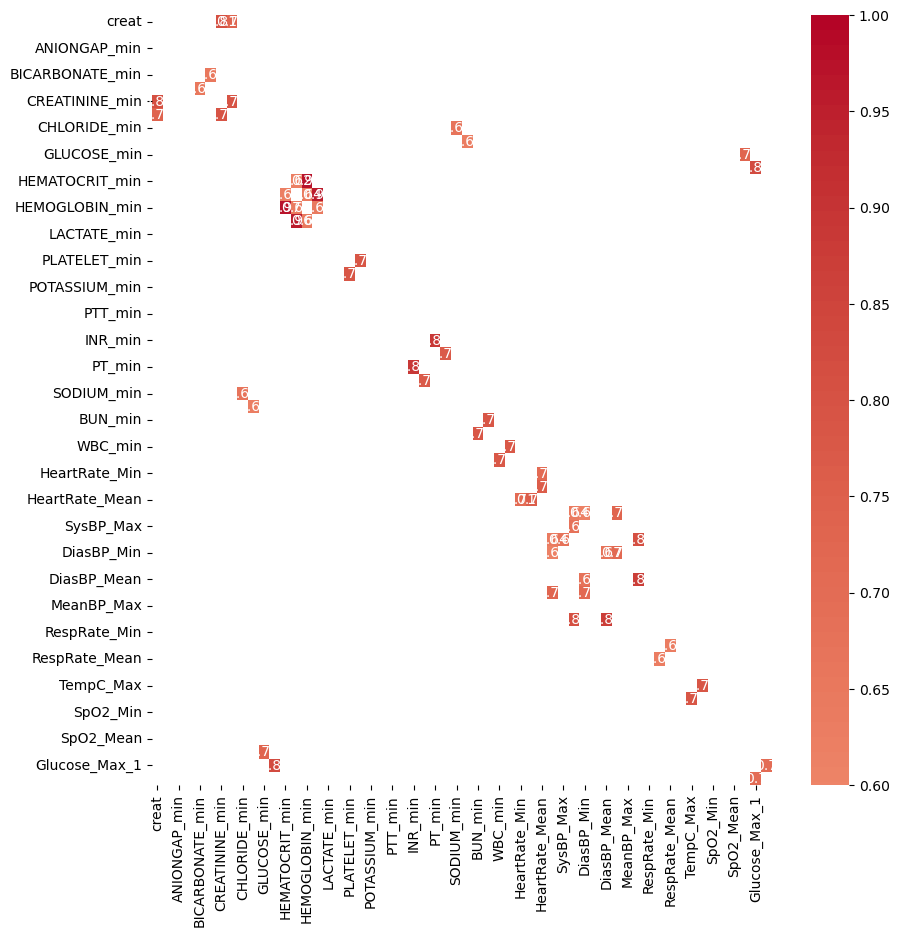

In [15]:
# Calculate the correlation matrix
#Finding most positive correlations
corr_matrix = df_dist.corr()

# Create a mask to filter values less than 0.6 and greater than 1.0
mask = (corr_matrix < 0.6) | (corr_matrix == 1.0)

# Apply the mask
filtered_corr = corr_matrix.mask(mask)

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Plot the heatmap with the filtered correlation values
sns.heatmap(filtered_corr, cmap='coolwarm', annot=True, center=0, vmin=0.6, vmax=1.0)
plt.show()

The correlated heatmap shows the most positively correlated values. This allows the viewer to better see which values have correlation values between 0.6 and 1.0. 

In [16]:
# Select the upper triangle of the correlation matrix to avoid duplicates
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
filtered_corr_matrix = corr_matrix.where(upper_triangle)

# Filter the correlations between 0.6 and 1.0
correlated_pairs = filtered_corr_matrix.stack().loc[lambda x: (x > 0.6) & (x < 1.0)]

# Print the pairs
for pair, value in correlated_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {value:.2f}")


creat and CREATININE_min: 0.81
creat and CREATININE_max: 0.74
BICARBONATE_min and BICARBONATE_max: 0.65
CREATININE_min and CREATININE_max: 0.79
CHLORIDE_min and SODIUM_min: 0.67
CHLORIDE_max and SODIUM_max: 0.63
GLUCOSE_min and Glucose_Min_1: 0.73
GLUCOSE_max and Glucose_Max_1: 0.82
HEMATOCRIT_min and HEMATOCRIT_max: 0.62
HEMATOCRIT_min and HEMOGLOBIN_min: 0.97
HEMATOCRIT_max and HEMOGLOBIN_min: 0.64
HEMATOCRIT_max and HEMOGLOBIN_max: 0.96
HEMOGLOBIN_min and HEMOGLOBIN_max: 0.64
PLATELET_min and PLATELET_max: 0.78
INR_min and PT_min: 0.88
INR_max and PT_max: 0.77
BUN_min and BUN_max: 0.78
WBC_min and WBC_max: 0.78
HeartRate_Min and HeartRate_Mean: 0.71
HeartRate_Max and HeartRate_Mean: 0.76
SysBP_Min and SysBP_Mean: 0.64
SysBP_Min and DiasBP_Min: 0.61
SysBP_Min and MeanBP_Min: 0.73
SysBP_Max and SysBP_Mean: 0.68
SysBP_Mean and MeanBP_Mean: 0.81
DiasBP_Min and DiasBP_Mean: 0.67
DiasBP_Min and MeanBP_Min: 0.72
DiasBP_Mean and MeanBP_Mean: 0.87
RespRate_Max and RespRate_Mean: 0.63
TempC_M

 ## Key takeaways

From the Journal Article, defintions of features in our dataset and medical termionology for clinical and health markers collected.

Creat and urine output are standard markers for diagnosing Acute Kidney Injury (AKI), (from the abstract)

INR - Internal Normalized Ratio: measure related to how blood clots

BUN- Blood Urea Nitrogen, marker of kidney function and how they are able to filter?

WBC - White Blood Cell Count

Lactate - high levels associated with metabolic stress

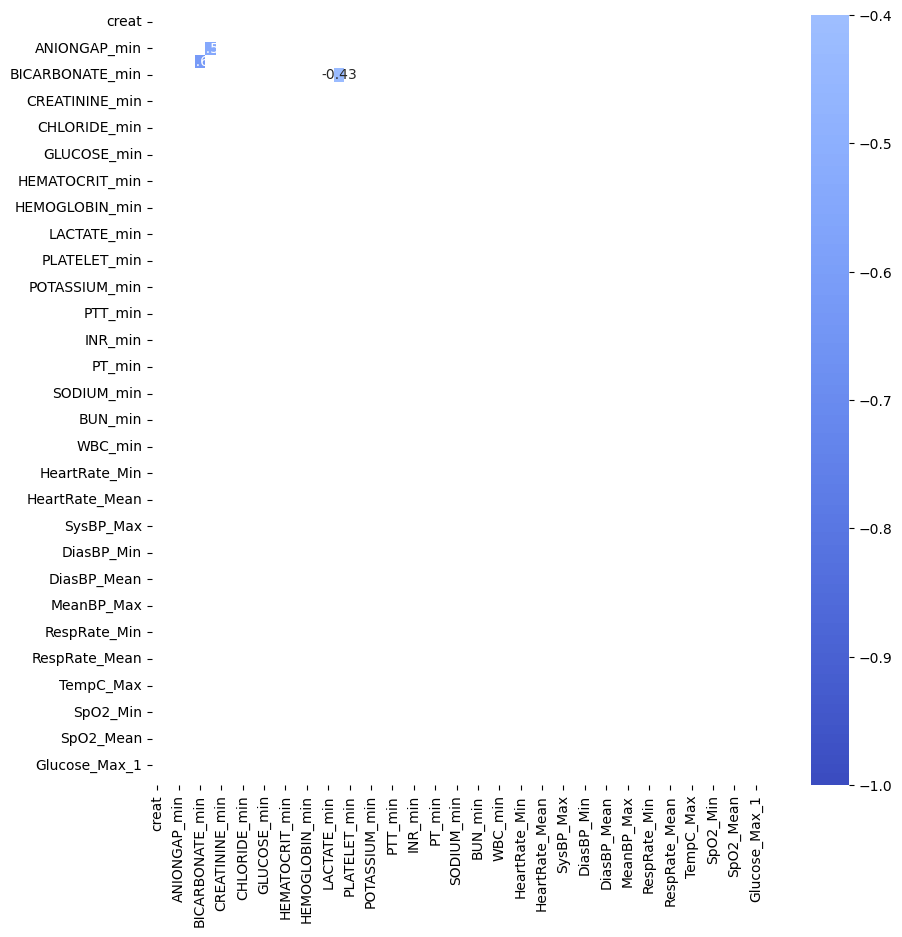

ANIONGAP_min and BICARBONATE_max: -0.55
ANIONGAP_max and BICARBONATE_min: -0.62
BICARBONATE_min and LACTATE_max: -0.43


In [17]:
#Finding most negative correlations
# Create a mask for values greater than -0.6 or less than -1.0
maskneg = (filtered_corr_matrix > -0.4) | (filtered_corr_matrix < -1.0)

# Apply the mask to keep only negative correlations between -1.0 and -0.4
filtered_neg_corr = filtered_corr_matrix.mask(maskneg)

# Filter the negative correlations between -1.0 and -0.4
negatively_correlated_pairs = filtered_corr_matrix.stack().loc[lambda x: (x < -0.4) & (x > -1.0)]

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_neg_corr, cmap='coolwarm', annot=True, center=0, vmin=-1.0, vmax=-0.4)
plt.show()

# Print the pairs
for pair, value in negatively_correlated_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {value:.2f}")

The correlation heatmap shows the most negatively correlated values, allowing the viewer to better see which values have correlation values between -0.4 and -1.0. We aimed to be consistent in our Exploratory Data Analysis by plotting both the most positively and negatively correlated values to better understand how the medical markers (data points) relate to one another.

In [18]:
# Summmary Statisstics of our Dataframe
columns_to_describe = ['creat', 'aki_stage', 'BUN_max']  # List of columns
df_dist[columns_to_describe].describe()


#Decided to look through the summary statistics for creat, aki_stage and BUN_max,
#These are features we are interested in after reading the Journal, that is not to say other features and summary statistics of those are not important, we chose to do this
# better understand the values important to kidney function as a whole and how they appear in our dataset.

,creat,aki_stage,BUN_max
count,13913.000000,13913.000000,13913.000000
mean,1.847954,1.251204,41.778075
std,1.864963,1.134089,29.333440
min,0.100000,0.000000,2.000000
25%,1.000000,0.000000,20.000000
50%,1.342936,1.000000,33.616968
75%,1.400000,2.000000,55.000000
max,20.100000,3.000000,272.000000


Summary statistics of the clean df_dist dataframe, this lets you see the disttribution, central tendencies and variability of the dataset.

In [19]:
# Assuming you have a DataFrame named df_dist
#Saving to csv for export
df_dist.to_csv('newAKIdist.csv', index=False)

In [20]:
## Ideas of Things to plot

##Biomarkers, for AKI prediction
##Serum Creatine SCr, estimated glomerular filtration rate (eGFR)

#Blood Urea Nitrogen (BUN) - Elevated levels indicate impaired Kidney Function CHECKED

##Albumin - Low levels may be associated with kidney damage

##Lacate, high levels can be sign of tissue hypoxia and kidney distress.

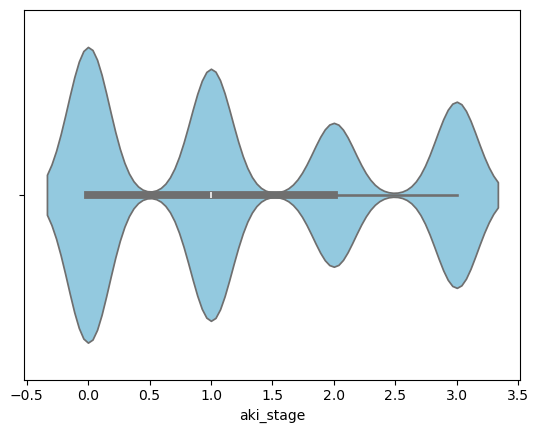

In [21]:
#Violin Plot of AKI_Stage depicts distributions of numeric data for one or more groups using density curves.
sns.violinplot(x=df_dist["aki_stage"], color="skyblue")
plt.show()

The violin plot above shows the distribution of aki_stage data across the the different categories. This is very similar to the distribution of aki_stages after rebalancing plot above.

<Axes: xlabel='creat'>

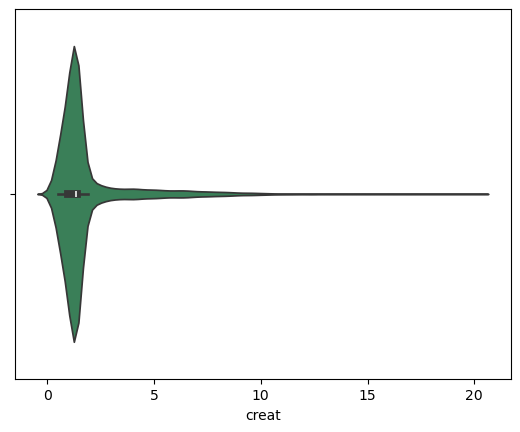

In [22]:
#Violin plot of creat depicts distributions of numeric data for one or more groups using density curves.
sns.violinplot(x=df_dist["creat"], color='seagreen')

As you can see by this plot the probability distribution of creat values fall closer to zero than 5. In this case there is not much distribution between a wide range of creat values.

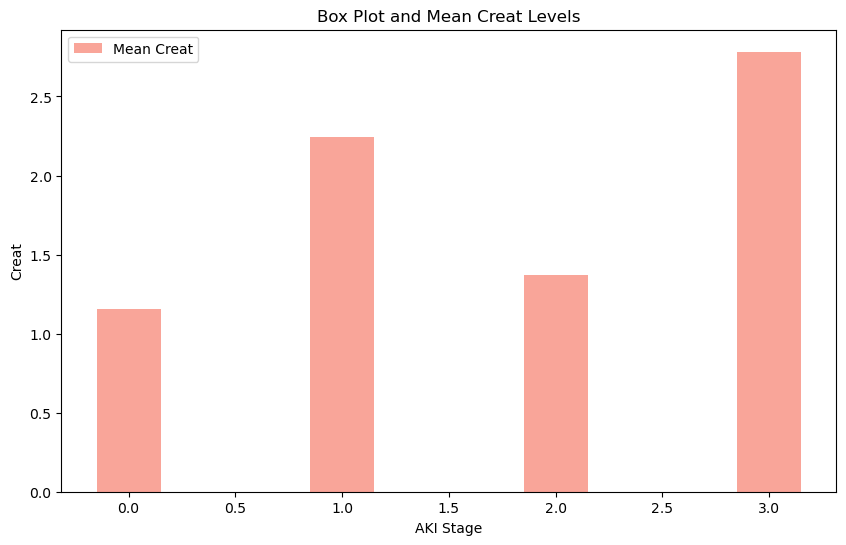

In [23]:
#Scatterplot of AKI_STAGE vs. creat
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only aki stages 0, 1, 2, 3
filtered_df = df_dist[df_dist['aki_stage'].isin([0, 1, 2, 3])]

# Calculate mean creat values for each aki_stage
mean_creat_per_stage = filtered_df.groupby('aki_stage')['creat'].mean()

# Create a figure and axis
plt.figure(figsize=(10, 6))

plt.bar(mean_creat_per_stage.index, mean_creat_per_stage.values, 
        alpha=0.6, color='#f66956', label='Mean Creat', width=0.3)

plt.title('Box Plot and Mean Creat Levels')
plt.xlabel('AKI Stage')
plt.ylabel('Creat')
plt.legend()
plt.show()

A more general barplot which provides and aggregated view of the creat values (mean creat)

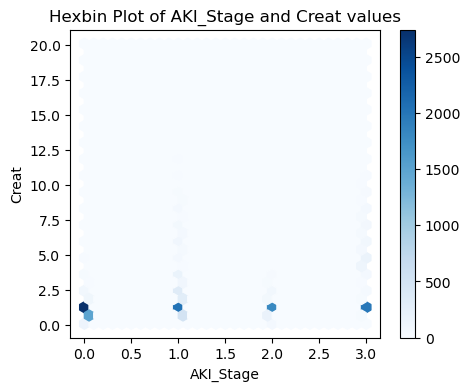

In [24]:
#Numeric VS. Numeric Data
#Hexagonal Binning Using Pandas
#pd.DataFrame.plot.hexbin(x=X, y=Y, gridsize=30, sharex=False, figsize(5,4))


#Hexagonal Binning: Plots of two numeric variables with records binned into hexagons

# Create a hexbin plot of Gold vs Silver medals
ax = df_dist.plot.hexbin(x="aki_stage", y="creat", gridsize=30, sharex=False, figsize=(5, 4), cmap="Blues")
ax.set_xlabel('AKI_Stage')
ax.set_ylabel('Creat')
ax.set_title('Hexbin Plot of AKI_Stage and Creat values')

# Show the plot
plt.show()



The point of using a hexabin plot here shows the density of the two numeric values. In this case we were very interested in the relationship between Creat and AKI_stage based on the findings in the Journal article and medical research about acute kidney injury. In addition to a hexabin plot we also created a bar plot showing the mean creat values at each given aki_stage, this gives us an aggregated view of the mean creat value for each aki_stage.

## Conclusion 

The primary goal of this EDA was to understand the relationship between AKI_stage and various clinical markers, such as BUN_max, creatinine, lactate, as well as health indicators like blood pressure and respiratory rate. Data cleaning involved removing features with over 40% missing values, filling in NA values with the feature mean, and rebalancing the dataset for a more even distribution of AKI_stages. After cleaning, correlation plots were created to visualize the overall relationships between features, highlighting the most positively and negatively correlated values. Simple visualizations, including bar plots, hexbin plots, and violin plots, were used to explore the clinical data, along with summary statistics to understand feature frequencies.